# Olympic Capstone Project

# Introduction

The Olympics are regarded as a major athletic event in which thousands of competitors from all over the world compete in a range of events. Nations from all over the world compete, and the Olympic games are often regarded as the world's most popular sporting event. Data Science and Machine Learning techniques will be of significant assistance in the decision-making processes of trainers, players, and governments in these countries.

The findings may be used to highlight the need for new policies to increase the quality of physical education in a country. According to the data, a variety of factors contribute to these countries' performance in the games.

The following dataset contains information about olympic events that occurred between 2000 and 2012. Summer and winter olympic sports are also included. The dataset has a total of ten features. There are 8618 observations. 

    Players' names, ages, countries, medal types, and total medals earned are all included in the data collection.
    The dataset also assume Madel won in group sports also as individual Medal for each player.

    A single player can play many games.

    Year - The year in which a certain olympic event took place.

    Date Given - The date on which a sporting event will take place.

    Same A player can compete in a number of Olympic events.


## Step 2 (Python and DS): Read the dataset in pandas and perform the steps as suggested.

1. Please do the basic exploration of the data. (Remember the dataset contains information from different years. So whatever steps you perform should make logical sense.)
2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.
3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.
4. Please remove special characters from the name column.
5. Perform data visualization techniques to appropriate columns and explain them.  
6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.
7. Please perform appropriate numerical measures on each column and report them accordingly.
8. Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

## Step 3 (PySpark): Once u have done the data cleaning please convert the pandas dataframe to pyspark dataframe and do the following transformation

1. Write PySpark code to read olympix_data.csv file
2. Write PySpark code to print the Olympic Sports/games in the dataset.
3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game
4. Sort the result based on the total number of medals.
5. Find the total number of medals won by each country in swimming.
6. Find the total number of medals won by each country in Skeleton.
7. Find the number of medals that the US won yearly.
8. Find the total number of medals won by each country.
9. Who was the oldest athlete in the olympics? 
10. Which country was he/she from?

### Import Dependecies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotiing
import seaborn as sns #plotiing
import missingno as msno # missing value
%matplotlib inline
plt.style.use('dark_background')

## Loading data from a CSV file(s):

In [2]:
file_location ='/kaggle/input/olympic/olympic.csv'
olympic=pd.read_csv(file_location)

## Dimension of data

In [3]:
olympic.shape

(8618, 10)

## Overview of the data

In [4]:
olympic.head(3)#Print first three observations

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6


In [5]:
olympic.tail(3)#Print last three observations

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


## Identify variables

In [6]:
olympic.dtypes

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
brone_medal       int64
total_medal       int64
dtype: object

In [7]:
olympic['Date_Given']=olympic['Date_Given'].str.replace('/','-')#inconsistent date so bring in single format
olympic['Date_Given'] = olympic['Date_Given'].astype('datetime64[ns]')# changing to appriopate data types
olympic['year'] = olympic['year'].astype('category')# changing to appriopate data types
olympic['country'] = olympic['country'].astype('category')# changing to appriopate data types
olympic['sports'] = olympic['sports'].astype('category')# changing to appriopate data types

Observation
----------------------------------------------------

|              | Earlier        |Later
|:-------------|:---------------|:---------------|
| name         | object         | object         |
| age          | float64        | float64        |
| country      | category       | category       |
| year         | int64          | category       |
| Date_Given   | object         | datetime64[ns] |
| sports       | object         | category       |
| gold_medal   | int64          | int64          |
| silver_medal | int64          | int64          |
| brone_medal  | int64          | int64          |
| total_medal  | int64          | int64          |

# 1. Please do the basic exploration of the data.

## Missing Value in Dataset

In [8]:
print("Number of missing value in dataset")
olympic.isnull().sum()#sum of missing value

Number of missing value in dataset


name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

<AxesSubplot:>

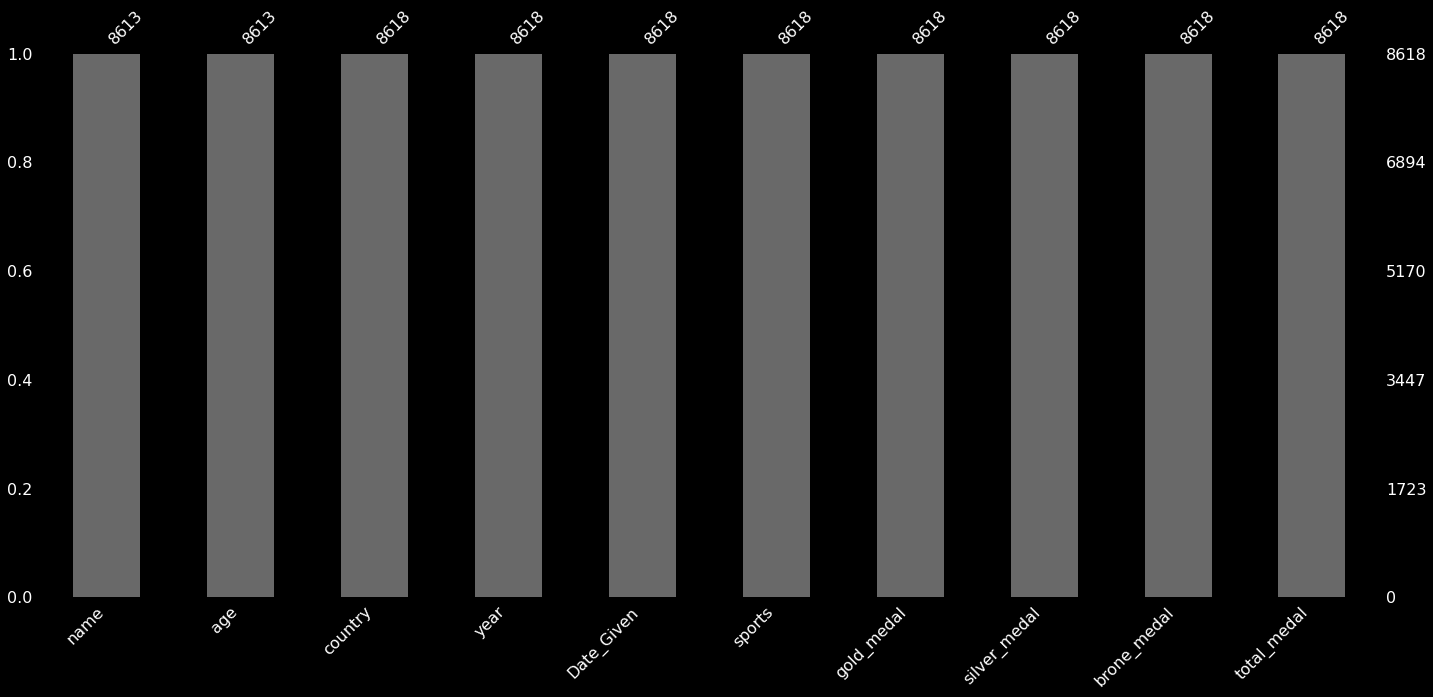

In [9]:
msno.bar(olympic)

5 null values in name and age column

## Duplicate Value in DataSet

In [10]:
print("Number of duplicated value in dataset")
olympic.duplicated().sum()#sum of duplicated value

Number of duplicated value in dataset


3

3 duplicate values

### Dividing DataSet Based on Winter and  Summer (for exploration purpose)

In [11]:
df1=olympic.copy(deep=True)

In [12]:
df1['month'] = df1['Date_Given'].dt.month
df1['season'] = np.where(df1['month']== 2, 'winter', 'summer')

In [13]:
summer=df1[df1['season']=='summer']
winter=df1[df1['season']=='winter']

In [14]:
def summer_olympic(year):
    return summer[summer['year']==year]

### Distribution of player in each olympic

# 2. Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

In [15]:
summer_2000=summer_olympic(2000)
summer_2004=summer_olympic(2004)
summer_2008=summer_olympic(2008)
summer_2012=summer_olympic(2012)
print('olympic:' ,'Skewness_of_Age', 'Dimensions','Missing Values')
print('summer      :',summer['age'].skew().round(1),summer.shape,summer['age'].isnull().sum())
print('summer 2000 :',summer_2000['age'].skew().round(1),summer_2000.shape,summer_2000['age'].isnull().sum())
print('summer 2004 :',summer_2004['age'].skew().round(1),summer_2004.shape,summer_2004['age'].isnull().sum())
print('summer 2008 :',summer_2008['age'].skew().round(1),summer_2008.shape,summer_2008['age'].isnull().sum())
print('summer 2012 :',summer_2012['age'].skew().round(1),summer_2012.shape,summer_2012['age'].isnull().sum())

olympic: Skewness_of_Age Dimensions Missing Values
summer      : 0.9 (7327, 12) 5
summer 2000 : 0.8 (1840, 12) 0
summer 2004 : 0.8 (1839, 12) 0
summer 2008 : 1.1 (1872, 12) 0
summer 2012 : 1.1 (1776, 12) 5


Observation:
------------------------------
We can see that all missing values are present in 2012 summer olympic games.Also this is one of event where overall  Skewness is greater as compare to other.SO, if we somehow know the reason , we can deal missing value and skewneww effectively. 

In [16]:
olympic.index[olympic.isnull().any(axis=1)]

Int64Index([1428, 1429, 1430, 4485, 4486], dtype='int64')

Observation :
---------------------------------

we can see that indexes at which missing value present in dataset.Lets check it.

Index= [1428, 1429, 1430, 4485, 4486]

In [17]:
olympic[1428:1431]#Indexes at which missing values are present

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1


In [18]:
olympic[4485:4487]#Indexes at which missing values are present

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


Observation
----------------------------------------------

So we can see that missing value basically present in sports game.
Both name and row are absent we can not able to identify it even if we try to impute missing value present in age column.I going to just drop this value. 

# 3. Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps.

In [19]:
summer_2012[summer_2012['country']=='Argentina']

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,month,season
1808,Sebastian Crismanich,25.0,Argentina,2012,2012-08-12,Taekwondo,1,0,0,1,8,summer
1921,Juan Martín del Potro,23.0,Argentina,2012,2012-08-12,Tennis,0,0,1,1,8,summer
2944,Lucas Calabrese,25.0,Argentina,2012,2012-08-12,Sailing,0,0,1,1,8,summer
2947,Juan de la Fuente,35.0,Argentina,2012,2012-08-12,Sailing,0,0,1,1,8,summer
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4488,Lucha Aymar,34.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4493,Noel Barrionuevo,28.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4498,Martina Cavallero,22.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer
4501,Silvina D'Elia,26.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1,8,summer


Observation
-----------------------------------
Medal from sports game count as one medal for One nation but here we can see that medal are display for each player, theis can lead to biasness in our approach.But for sake of simplicity , I am not going to deal with it.

In [20]:
olympic=olympic.drop_duplicates()

Observation
--------------------------------------
we already new that both missing value and duplicate pointing on same row ans also lack majoe atribute and part of team game. So ,dropping this row is effective in two way.First it leads to decrease in bias by droping duplicate value and also handling of missing value.  

## 4. Please remove special characters from the name column.

In [21]:
import unidecode
import re
def chr_change(text):
    result=unidecode.unidecode(text)
    re.sub(r"\W+|_", " ", result)
    return result

olympic["New_name"] = olympic["name"].str.replace(r"[\W+|_]", " ")
olympic=olympic.dropna()
olympic["New_name"]=olympic["New_name"].apply(chr_change)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


# 5. Perform data visualization techniques to appropriate columns and explain them. 

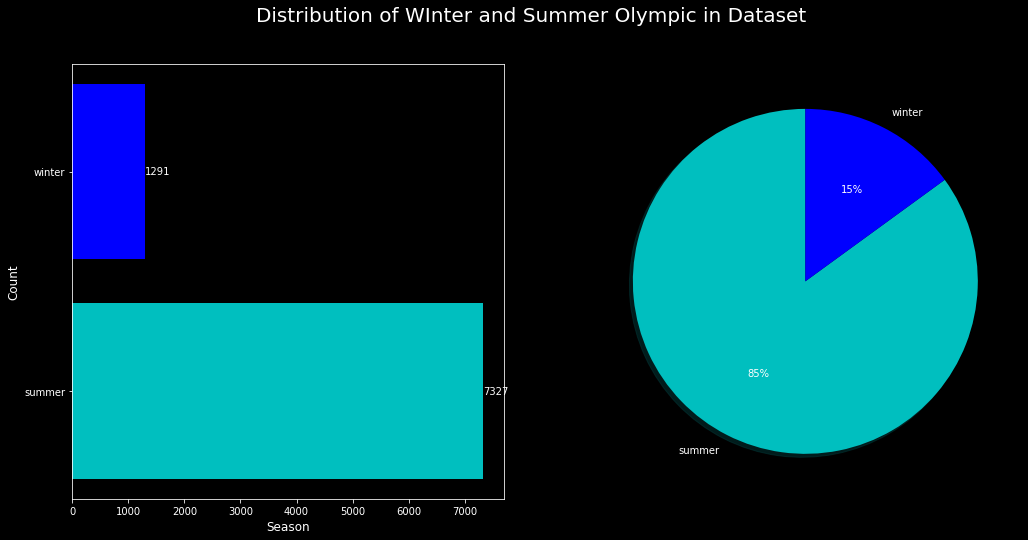

In [22]:
total_cont=df1['season'].value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Season" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0))
fig.suptitle('Distribution of WInter and Summer Olympic in Dataset',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])

plt.style.use('dark_background')
plt.show()


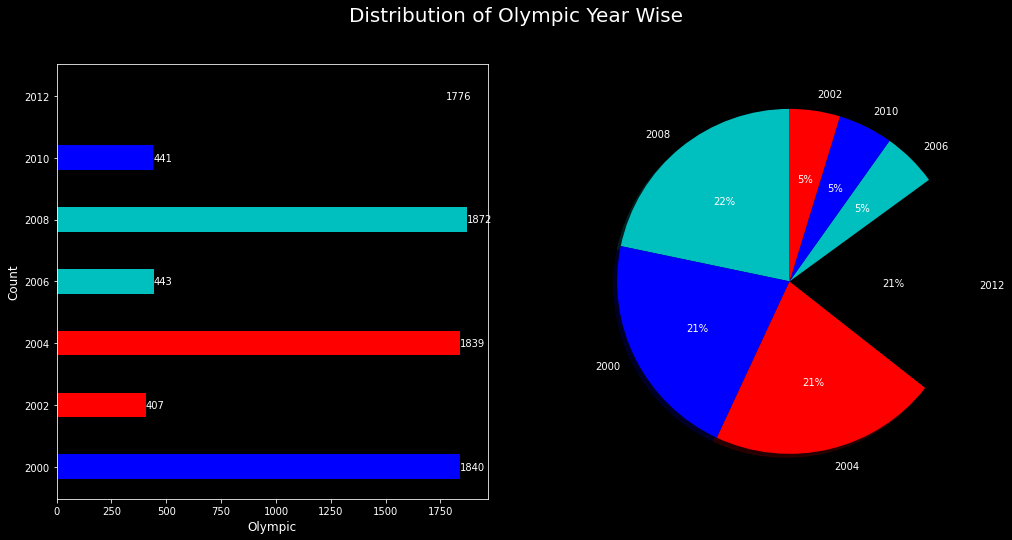

In [23]:
# distribution of player in each olympic
total_cont=df1.year.value_counts()
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Count" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Olympic" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0,0,0,0,0,0,0))
fig.suptitle('Distribution of Olympic Year Wise',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])

plt.style.use('dark_background')
plt.show()

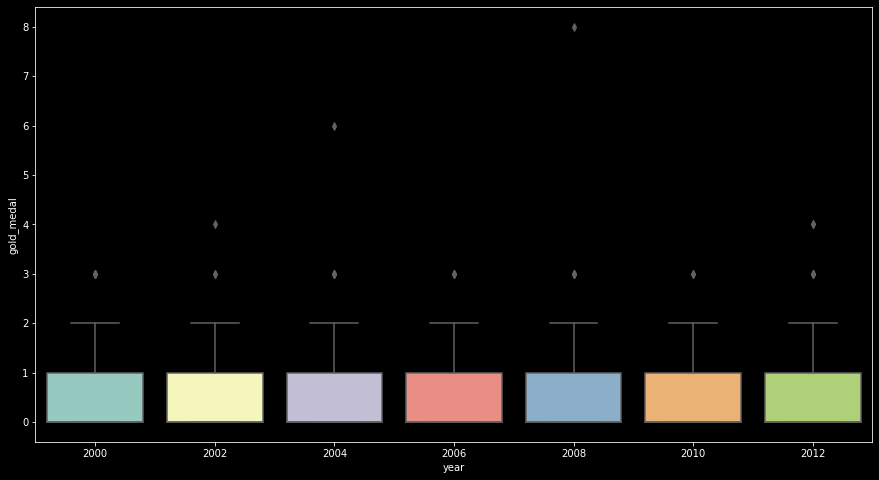

In [24]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="gold_medal", x="year", data=df1)
sns.set_style("dark")

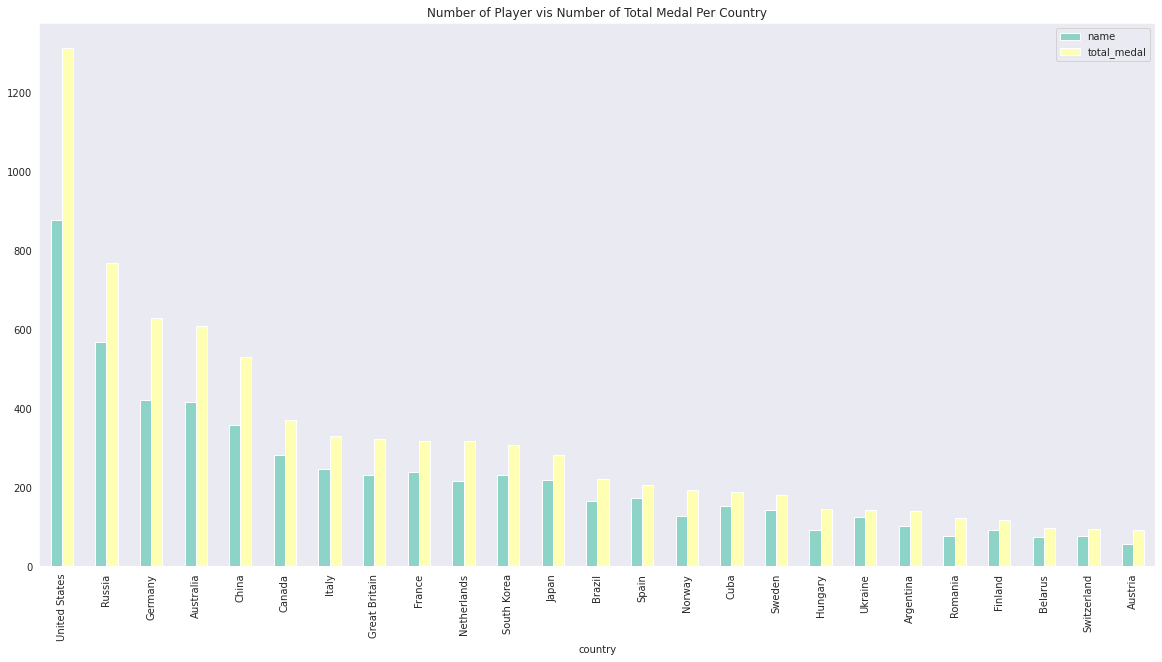

In [25]:
df1.groupby('country').agg({'name':'nunique','total_medal':'sum'}).sort_values(by='total_medal',ascending=False)[:25].plot(kind='bar',figsize=(20,10),title='Number of Player vis Number of Total Medal Per Country')
sns.set_style("dark")

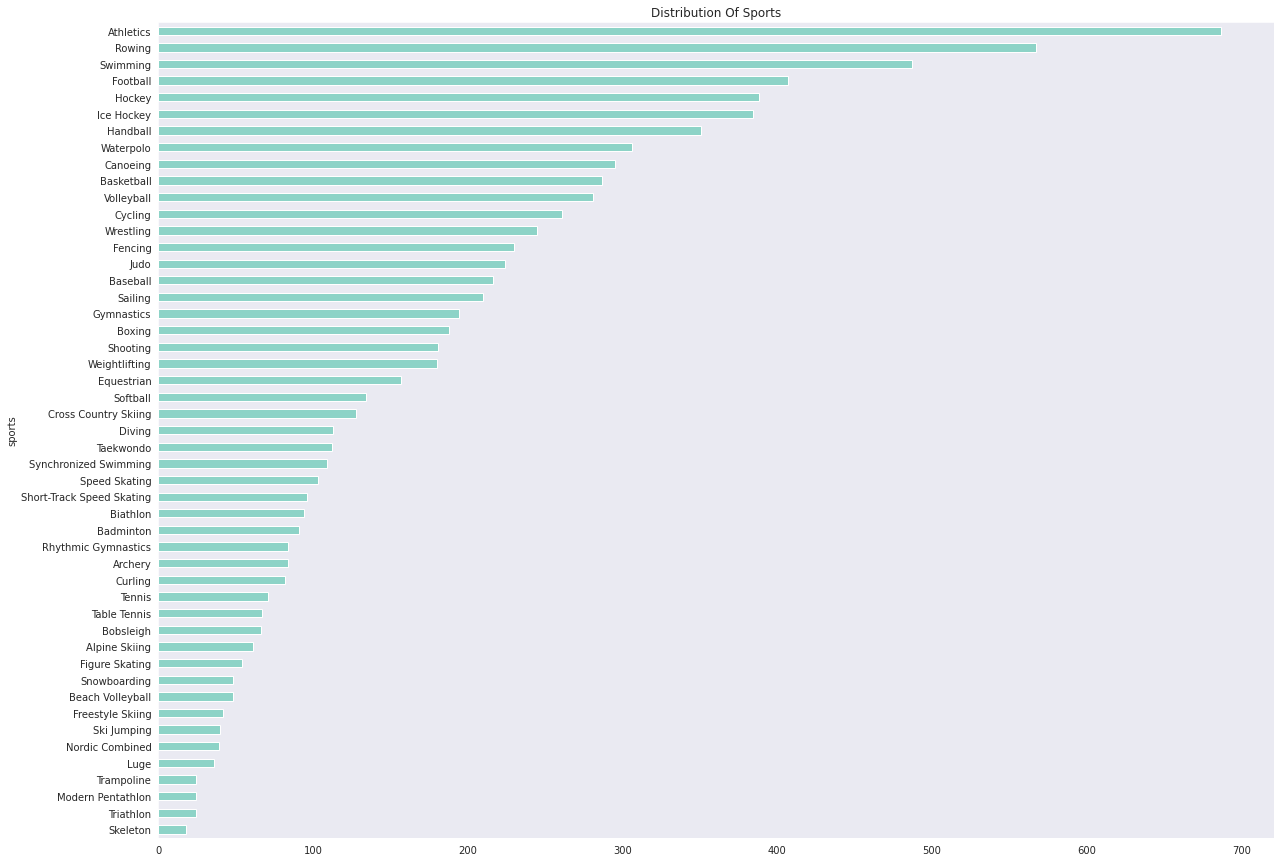

In [26]:
df1.groupby(['sports']).size().sort_values(ascending=True).plot(kind = "barh",figsize=(20, 15),title='Distribution Of Sports')
sns.set_style("dark")

# 6. Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

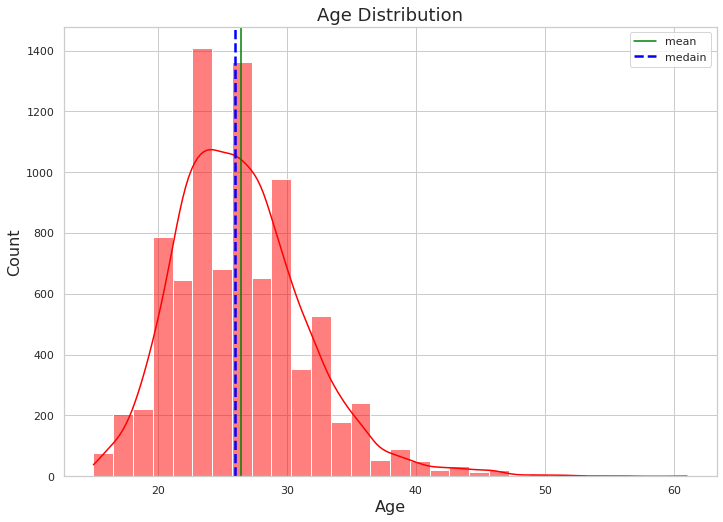

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.histplot(olympic['age'], kde=True, color='red', bins=30)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=olympic['age'].mean(),color='green',label='mean')
plt.axvline(x=olympic['age'].median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

In [28]:
olympic['age'].skew()

0.8590070668484233

In [29]:
print('Skewness in Summmer Game in Age Attribute :',summer['age'].skew())
print('Skewness in Summmer Game in Age Attribute :',winter['age'].skew())

Skewness in Summmer Game in Age Attribute : 0.9406258615029625
Skewness in Summmer Game in Age Attribute : 0.4289162646610329


Observation
------------------------------------------

- Summer olympic age attribur age is moderately skewed.Because If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
- Winter olympic age attribur age is fairly symmetrical.Because If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

Text(0.5, 0.98, 'Distribtion of Age in different Year')

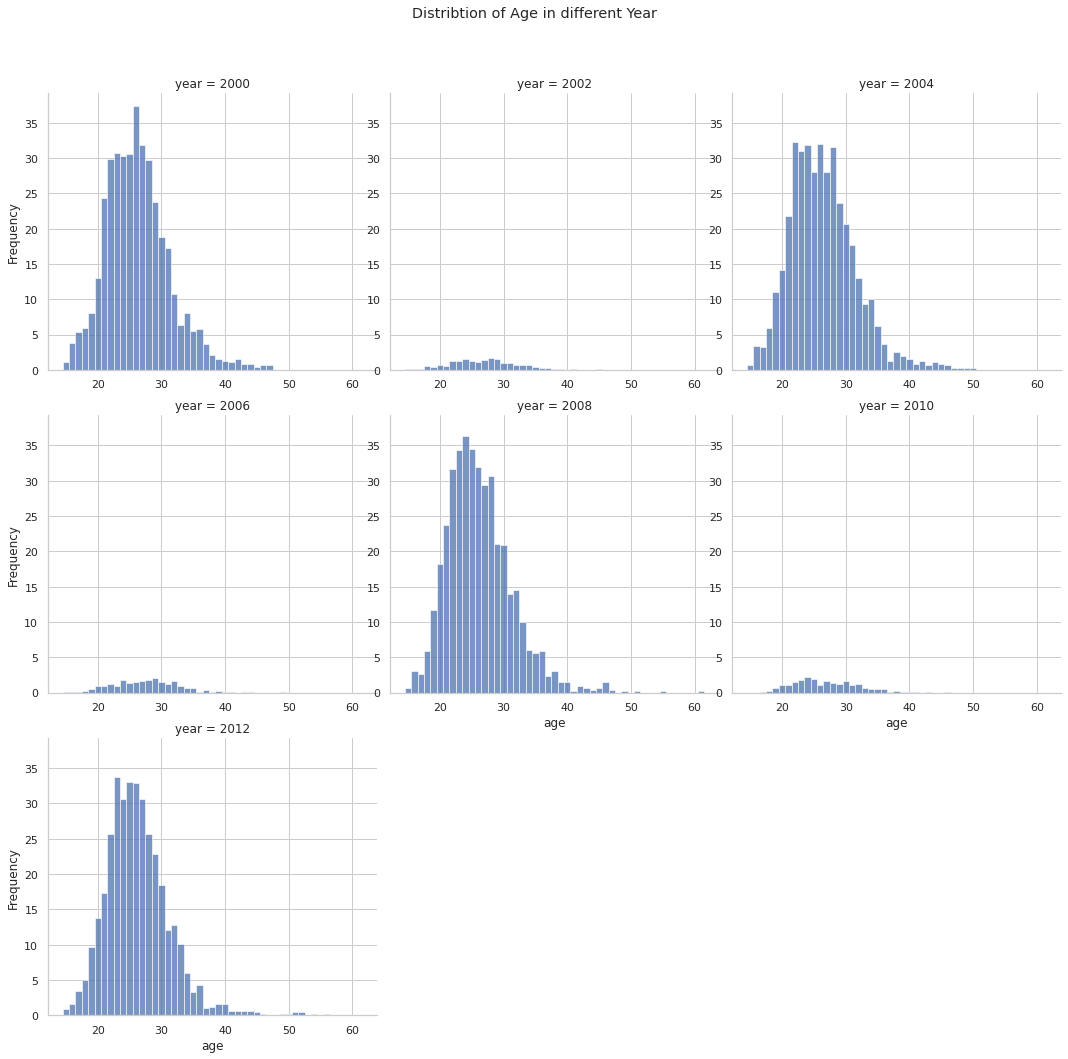

In [30]:
ax=sns.displot(
    olympic, x="age", col="year",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),col_wrap=3,discrete=True,stat="frequency"
)
for axis in ax.axes.flat:
    axis.tick_params(labelleft=True)
    axis.tick_params(labelbottom=True)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure
ax.fig.suptitle('Distribtion of Age in different Year')

Observation:
------------------------------------------
2008 and 2012 year has most skeweed and lot of outlier on tail side.

In [31]:
summer_2008[summer_2008['age']>=45]

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal,month,season
438,Heike Kemmer,46.0,Germany,2008,2008-08-24,Equestrian,1,0,1,2,8,summer
441,Hinrich Romeike,45.0,Germany,2008,2008-08-24,Equestrian,2,0,0,2,8,summer
2815,Rajmond Debevec,45.0,Slovenia,2008,2008-08-24,Shooting,0,0,1,1,8,summer
2834,Warren Potent,46.0,Australia,2008,2008-08-24,Shooting,0,0,1,1,8,summer
2839,Ralf Schumann,46.0,Germany,2008,2008-08-24,Shooting,0,1,0,1,8,summer
3005,Santiago Lange,46.0,Argentina,2008,2008-08-24,Sailing,0,0,1,1,8,summer
6096,Rolf-Göran Bengtsson,46.0,Sweden,2008,2008-08-24,Equestrian,0,1,0,1,8,summer
6098,Mac Cone,55.0,Canada,2008,2008-08-24,Equestrian,0,1,0,1,8,summer
6106,Jill Henselwood,45.0,Canada,2008,2008-08-24,Equestrian,0,1,0,1,8,summer
6108,Anne Jensen-van Olst,46.0,Denmark,2008,2008-08-24,Equestrian,0,0,1,1,8,summer


Observation
--------------------------------
Now its time to check reason behind skewnness in dataset.So , we got our reason behind it. Basically two sports Equestrian and Archery may be behing overall skewness of dataset.
Another natural question came to mind , why average age of Equestrian players is more as compare to other.Than I found this ,
What is the average age of equestrian riders? With a median age of 36, equestrians are the oldest Olympians. More sedate sports also tend to have older athletes; golf and shooting are near the top of the list.
So,Eqestrain can behave as outlier in our dataset.we had to came up with effective streatgy to deal with it.


In [32]:
olympic[olympic['sports']=='Equestrian']['total_medal'].sum()

182

Observation
--------------------------------
Next thing came in  my why can not we just delete it.But we can not when I found that Equestran sports overall gain 182 medals in this olympic.It can lead to huge data loose.SO, we had to go with another affective approach.

In [33]:
olympic[olympic['sports']!='Equestrian']['age'].skew()

0.5893075827643961

Observation
--------------------------------

I try to check skewness without equestrian .So it lead to huge decrease in skewness in our dataset.So, we also found it our culprit for skewness also.But we can not delete it. 
Skewness Result Interpretaion - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

## Transformation on Age Column

Text(0, 0.5, 'Age')

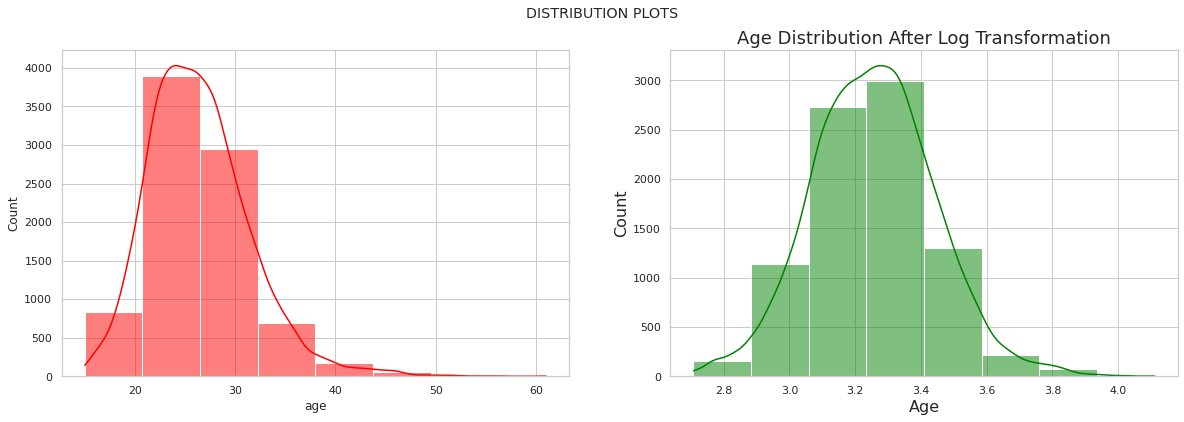

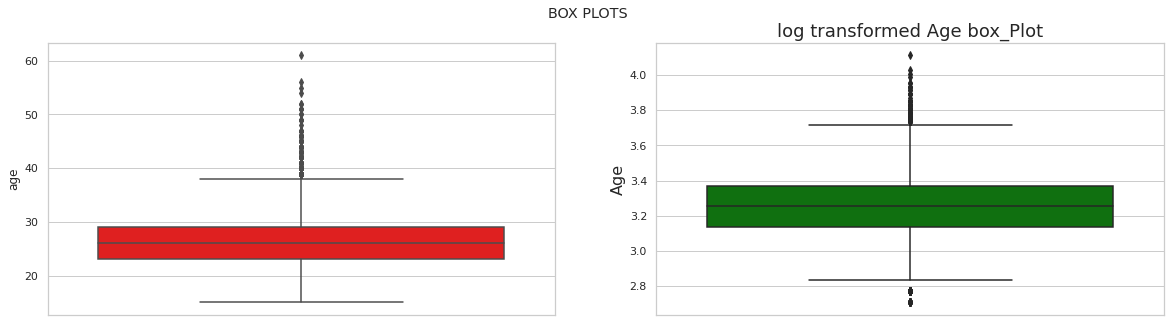

In [34]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('DISTRIBUTION PLOTS')
# Histogram Plot for distribution and skewness
sns.histplot(olympic['age'], kde=True, color='red', bins=8,ax=ax[0]) #Age
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.histplot(np.log(olympic['age']), kde=True, color='green', bins=8,ax=ax[1]) #log transformed Age 
plt.title('Age Distribution After Log Transformation', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Box Plot for 5-point summary , distribution and outliers

fig, ax = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('BOX PLOTS')

sns.boxplot(data = olympic ,y=olympic['age'], color='red',ax=ax[0]) #Age
plt.title('Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

sns.boxplot(data = olympic ,y=np.log(olympic['age']), color='green',ax=ax[1]) #log transformed Age  
plt.title('log transformed Age box_Plot', fontsize=18)
plt.ylabel('Age', fontsize=16)

## 7. Please perform appropriate numerical measures on each column and report them accordingly.

### Statistical Summary of Each Features

In [35]:
olympic.describe().round(0)# statistical summary of nummerical varriable and rounding of float values to zero

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.0,8613.0,8613.0,8613.0,8613.0
mean,26.0,0.0,0.0,0.0,1.0
std,5.0,1.0,1.0,1.0,0.0
min,15.0,0.0,0.0,0.0,1.0
25%,23.0,0.0,0.0,0.0,1.0
50%,26.0,0.0,0.0,0.0,1.0
75%,29.0,1.0,1.0,1.0,1.0
max,61.0,8.0,3.0,3.0,8.0


In [36]:
olympic.describe(include='object')# statistical summary of categorical  varriables

,name,New_name
count,8613,8613
unique,6955,6954
top,Matt Wells,Matt Wells
freq,4,4


# Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

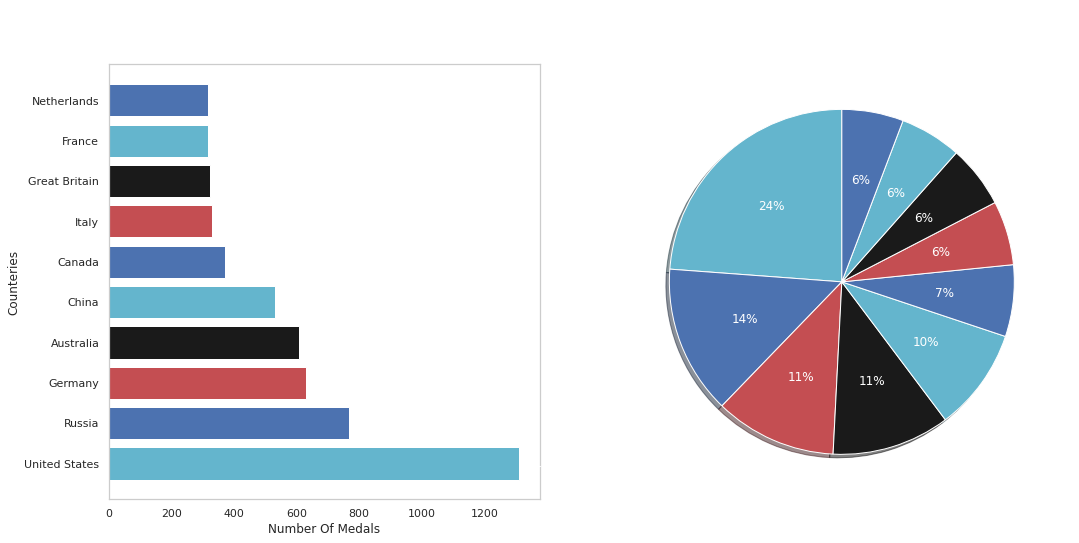

In [37]:
total_cont=olympic.groupby('country')['total_medal'].sum().nlargest(10)
label=total_cont.index
values=total_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Total medal',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

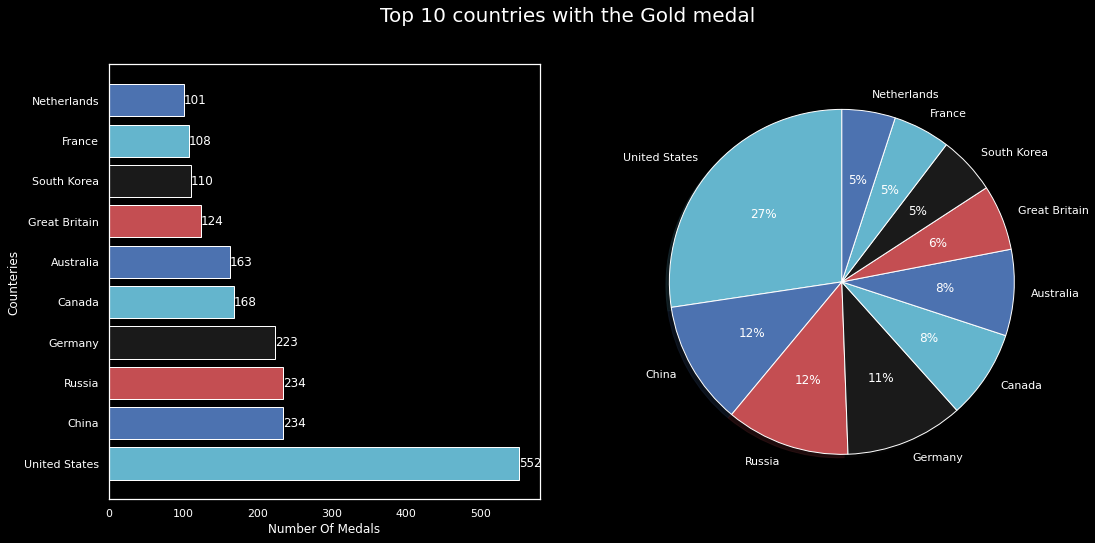

In [38]:
gold_cont=olympic.groupby('country')['gold_medal'].sum().nlargest(10)
label=gold_cont.index
values=gold_cont.values.flatten()
#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Gold medal',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

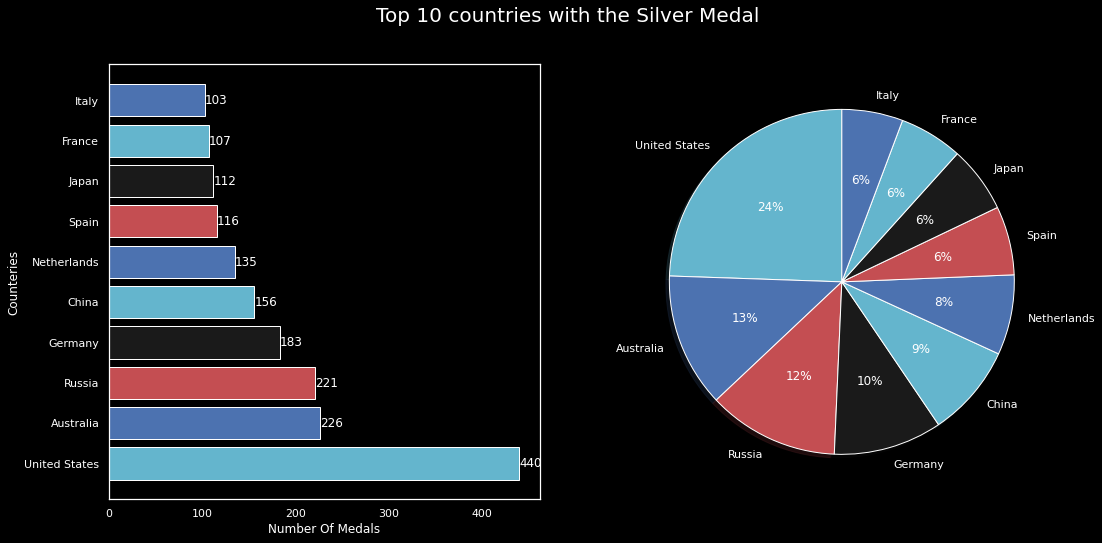

In [39]:
silv_cont=olympic.groupby('country')['silver_medal'].sum().nlargest(10)
label=silv_cont.index
values=silv_cont.values.flatten()

#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Silver Medal',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

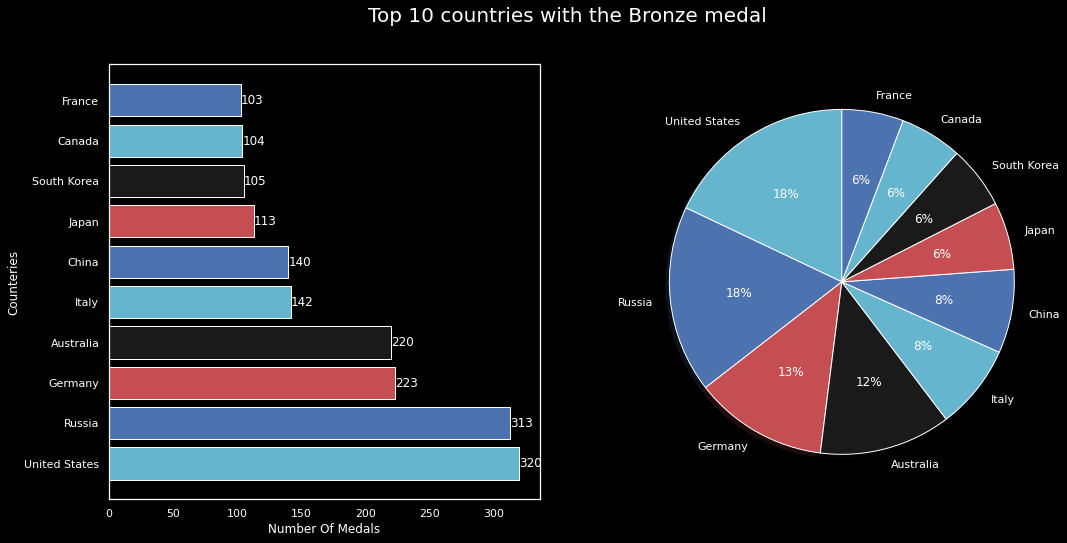

In [40]:
bronze_cont=olympic.groupby('country')['brone_medal'].sum().nlargest(10)

label=bronze_cont.index
values=bronze_cont.values.flatten()

#pie plot
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[0].set_ylabel( "Counteries" , size = 12 )
# Set label for y-axis
axs[0].set_xlabel( "Number Of Medals" , size = 12 )
plt.style.use('dark_background')
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0, 0, 0, 0,0, 0, 0, 0,0,0))
fig.suptitle('Top 10 countries with the Bronze medal',).set_size(20)
axs[0].grid(False)
axs[0].bar_label(axs[0].containers[0])
plt.style.use('dark_background')
plt.show()

In [41]:
olympic.to_csv('new_olympic.csv',index=False)

# Pyspark

In [42]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 KB 13.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=617aa0b673201a82c242ddd73a31ef0df4f889477c7701fd10826fe30e65ed1e
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.5
    Uninstalling py4j-0.10.9.5:
      Successfully uninstalled py4j-0.10.9.5


In [43]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col, desc, asc, count

In [44]:
spark = SparkSession.builder.appName("practice").getOrCreate()
spark.sparkContext.getConf().getAll();

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/31 06:48:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


1. Write PySpark code to read olympix_data.csv file
2. Write PySpark code to print the Olympic Sports/games in the dataset.
3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game
4. Sort the result based on the total number of medals.
5. Find the total number of medals won by each country in swimming.
6. Find the total number of medals won by each country in Skeleton.
7. Find the number of medals that the US won yearly.
8. Find the total number of medals won by each country.
9. Who was the oldest athlete in the olympics? 
10. Which country was he/she from?

# Write PySpark code to read olympix_data.csv file

In [45]:
df = spark.read.csv(file_location,header=True,inferSchema='True') # reading fil ewith help of pyspark 

In [46]:
sparkDF=spark.createDataFrame(olympic) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- name: string (nullable = true)
 |-- age: double (nullable = true)
 |-- country: string (nullable = true)
 |-- year: long (nullable = true)
 |-- Date_Given: timestamp (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: long (nullable = true)
 |-- silver_medal: long (nullable = true)
 |-- brone_medal: long (nullable = true)
 |-- total_medal: long (nullable = true)
 |-- New_name: string (nullable = true)



+--------------------+----+-------------+----+-------------------+--------------------+----------+------------+-----------+-----------+--------------------+
|                name| age|      country|year|         Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|            New_name|
+--------------------+----+-------------+----+-------------------+--------------------+----------+------------+-----------+-----------+--------------------+
|      Michael Phelps|23.0|United States|2008|2008-08-24 00:00:00|            Swimming|         8|           0|          0|          8|      Michael Phelps|
|      Michael Phelps|19.0|United States|2004|2004-08-29 00:00:00|            Swimming|         6|           0|          2|          8|      Michael Phelps|
|      Michael Phelps|27.0|United States|2012|2012-08-12 00:00:00|            Swimming|         4|           2|          0|          6|      Michael Phelps|
|    Natalie Coughlin|25.0|United States|2008|2008-08-24 0

# Write PySpark code to print the Olympic Sports/games in the dataset.

In [47]:
sparkDF.select('sports').distinct().show()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|Short-Track Speed...|
|              Rowing|
|            Swimming|
|       Alpine Skiing|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|          Equestrian|
|            Shooting|
|              Diving|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
+--------------------+
only showing top 20 rows



# 3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [48]:
sport_medal=sparkDF.groupBy("sports") \
    .agg(sum("total_medal").alias("Total")) \
    .sort(desc("Total"))

In [49]:
plot_sport_medal=sport_medal.toPandas()
plot_sport_medal

,sports,Total
0,Swimming,765
1,Athletics,753
2,Rowing,576
3,Football,407
4,Hockey,386
5,Ice Hockey,384
6,Handball,351
7,Canoeing,333
8,Waterpolo,306
9,Cycling,306


In [50]:

import plotly.express as px
fig = px.treemap(plot_sport_medal, 
                 path=["sports","Total"],
                 values=plot_sport_medal["Total"],
                 color='sports',width=1400, height=1600
                )
# fig.update_layout(
#     margin=dict(l=20, r=20, t=20, b=20),
#     paper_bgcolor="LightSteelBlue",
# )
fig.update_layout(
    uniformtext=dict(minsize=10, mode='show'),
    margin = dict(t=50, l=25, r=25, b=25),
    title_text = 'Total Medals in Each Sports',
    title_font_family="Arial",
    title_font_size = 22,
    title_font_color="black",
    title_x=0.5,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# Find the total number of medals won by each country in swimming and skelton ?

In [51]:
sp_count_TOt=sparkDF.groupby('sports','country').agg(sum("total_medal").alias("Total")).sort(desc("Total"))

In [52]:
sp_count_TOt.filter(sparkDF['sports']=='Swimming').show()
sp_count_TOt.filter(sparkDF['sports']=='Skeleton').show()

+--------+-------------+-----+
|  sports|      country|Total|
+--------+-------------+-----+
|Swimming|United States|  267|
|Swimming|    Australia|  163|
|Swimming|  Netherlands|   46|
|Swimming|        Japan|   43|
|Swimming|       France|   39|
|Swimming|        China|   35|
|Swimming|      Germany|   32|
|Swimming|       Russia|   20|
|Swimming|        Italy|   16|
|Swimming| South Africa|   11|
|Swimming|Great Britain|   11|
|Swimming|      Hungary|    9|
|Swimming|       Sweden|    9|
|Swimming|       Brazil|    8|
|Swimming|     Zimbabwe|    7|
|Swimming|      Ukraine|    7|
|Swimming|      Romania|    6|
|Swimming|       Canada|    5|
|Swimming|  South Korea|    4|
|Swimming|        Spain|    3|
+--------+-------------+-----+
only showing top 20 rows

+--------+-------------+-----+
|  sports|      country|Total|
+--------+-------------+-----+
|Skeleton|       Canada|    4|
|Skeleton|United States|    3|
|Skeleton|  Switzerland|    3|
|Skeleton|Great Britain|    3|
|Skeleton|   

# Find the number of medals that the US won yearly.

In [53]:
# sparkDF.filter(sparkDF['country']=='United States').groupby('year','country').agg({'gold_medal': 'sum',
# 'silver_medal': 'sum',
# 'brone_medal': 'sum',
# 'total_medal': 'sum'}).sort(desc("year")).show()

In [54]:
sparkDF.filter(sparkDF['country']=='United States').groupby('year','country').agg(sum("total_medal").alias("Total")).sort(desc("year")).show()

+----+-------------+-----+
|year|      country|Total|
+----+-------------+-----+
|2012|United States|  254|
|2010|United States|   97|
|2008|United States|  317|
|2006|United States|   52|
|2004|United States|  265|
|2002|United States|   84|
|2000|United States|  243|
+----+-------------+-----+



In [55]:
sparkDF.columns

['name',
 'age',
 'country',
 'year',
 'Date_Given',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'New_name']

# Find the total number of medals won by each country.

In [56]:
sparkDF.groupby('country').agg(sum("total_medal").alias("Total")).sort(desc("Total")).show()

+-------------+-----+
|      country|Total|
+-------------+-----+
|United States| 1312|
|       Russia|  768|
|      Germany|  629|
|    Australia|  609|
|        China|  530|
|       Canada|  370|
|        Italy|  331|
|Great Britain|  322|
|       France|  318|
|  Netherlands|  318|
|  South Korea|  308|
|        Japan|  282|
|       Brazil|  218|
|        Spain|  205|
|       Norway|  192|
|         Cuba|  188|
|       Sweden|  181|
|      Hungary|  145|
|      Ukraine|  143|
|    Argentina|  139|
+-------------+-----+
only showing top 20 rows



# Who was the oldest athlete in the olympics? Which country was he/she from?

In [57]:
OLd_ath=sparkDF.groupby('New_name','country','age').max('age').sort(desc("max(age)")).limit(1)
OLd_ath.select('New_name','country','age').show()

+----------+-------+----+
|  New_name|country| age|
+----------+-------+----+
|Ian Millar| Canada|61.0|
+----------+-------+----+

